## 1. We load the libraries

In [ ]:
# We load the libraries
import pandas as pd                # For data manipulation and analysis
import numpy as np                 # For numerical operations
import matplotlib.pyplot as plt    # For data visualization (plots)
import seaborn as sns              # For advanced visualizations
import scipy.special as special    # For special mathematical functions
from scipy.optimize import curve_fit  # For curve fitting (nonlinear regression)
from sklearn.metrics import r2_score  # For evaluating regression models
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.preprocessing import StandardScaler      # For feature scaling
from sklearn.linear_model import LinearRegression     # For linear regression models
from sklearn.metrics import mean_squared_error, r2_score  # For regression evaluation metrics

## 2. Load the Excel file with the data

In [110]:
# We try to load the file
df = pd.read_excel("TechnicalAssessment.xlsx")

# We view the first rows
print(df.head())

# We check how many columns the dataset has
print("Number of columns:", df.shape[1])


  id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0  70172,Male,Loyal Customer,13,Personal Travel,E...                                                                                                                                                                                                                                                                                                                                               
1  5047,Male,disloyal Customer,25,Business travel...                                                                                                                                                                            

## 3. File preprocessing

In [111]:
# Load the Excel file without headers
df_raw = pd.read_excel("TechnicalAssessment.xlsx", header=None)

# Display the first rows to check how the data is structured
print(df_raw.head())

# Split the values by commas (",") and expand into columns
df_clean = df_raw[0].str.split(",", expand=True)

# The first row contains the column names, we take it for the headers
df_clean.columns = df_clean.iloc[0]
df_clean = df_clean.drop(index=0).reset_index(drop=True)

# Display the first rows with the headers
print(df_clean.head())

# Verify the number of columns after cleaning
print("Number of columns:", df_clean.shape[1])


                                                   0
0  id,Gender,Customer Type,Age,Type of Travel,Cla...
1  70172,Male,Loyal Customer,13,Personal Travel,E...
2  5047,Male,disloyal Customer,25,Business travel...
3  110028,Female,Loyal Customer,26,Business trave...
4  24026,Female,Loyal Customer,25,Business travel...
0      id  Gender      Customer Type Age   Type of Travel     Class  \
0   70172    Male     Loyal Customer  13  Personal Travel  Eco Plus   
1    5047    Male  disloyal Customer  25  Business travel  Business   
2  110028  Female     Loyal Customer  26  Business travel  Business   
3   24026  Female     Loyal Customer  25  Business travel  Business   
4  119299    Male     Loyal Customer  61  Business travel  Business   

0 Flight Distance Inflight wifi service Departure/Arrival time convenient  \
0             460                     3                                 4   
1             235                     3                                 2   
2            1142       

## 4. Data overview

In [112]:
# General description of the variables
print(df_clean.describe(include='all'))

0           id  Gender   Customer Type     Age   Type of Travel     Class  \
count   129880  129880          129880  129880           129880    129880   
unique  129880       3               3      78                3         4   
top      70172  Female  Loyal Customer      39  Business travel  Business   
freq         1   65896          106097    3691            89692     62158   

0      Flight Distance Inflight wifi service  \
count           129880                129880   
unique            3827                     7   
top                337                     2   
freq               840                 32319   

0      Departure/Arrival time convenient Ease of Online booking  ...  \
count                             129880                 129880  ...   
unique                                 8                      7  ...   
top                                    4                      3  ...   
freq                               31879                  30390  ...   

0      Infli

## 5. Converting numeric columns

In [113]:
# Select numeric columns
cols_numericas = ['Age', 'Flight Distance', 'Inflight wifi service',
                  'Departure/Arrival time convenient', 'Ease of Online booking',
                  'Gate location', 'Food and drink', 'Online boarding',
                  'Seat comfort', 'Inflight entertainment', 'On-board service',
                  'Leg room service', 'Baggage handling', 'Checkin service',
                  'Inflight service', 'Cleanliness',
                  'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Convert these columns to numeric format (force conversion with 'coerce' for invalid values)
df_clean[cols_numericas] = df_clean[cols_numericas].apply(pd.to_numeric, errors='coerce')

# Show the number of null values in each column
print(df_clean.isnull().sum())


0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    1
Type of Travel                         0
Class                                  0
Flight Distance                       13
Inflight wifi service                  4
Departure/Arrival time convenient      6
Ease of Online booking                10
Gate location                         15
Food and drink                        10
Online boarding                       12
Seat comfort                           3
Inflight entertainment                 3
On-board service                       3
Leg room service                       2
Baggage handling                       6
Checkin service                        2
Inflight service                       5
Cleanliness                            1
Departure Delay in Minutes            15
Arrival Delay in Minutes             394
satisfaction                           0
dtype: int64


## 6. Verifying the dataset size

In [114]:
# Check the total number of rows
print("Total rows:", df_clean.shape[0])


Total rows: 129880


## 7. Imputation of missing values

In [115]:
# Define the columns with missing values to be imputed
columns_to_impute = ['Age', 'Flight Distance', 'Inflight wifi service',
                     'Departure/Arrival time convenient', 'Ease of Online booking',
                     'Gate location', 'Food and drink', 'Online boarding',
                     'Seat comfort', 'Inflight entertainment', 'On-board service',
                     'Leg room service', 'Baggage handling', 'Checkin service',
                     'Inflight service', 'Cleanliness', 'Departure Delay in Minutes']

# Impute the missing values with the median of each column (more robust against outliers)
for col in columns_to_impute:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Impute the 'Arrival Delay in Minutes' column with 0 (if considered reasonable)
df_clean['Arrival Delay in Minutes'] = df_clean['Arrival Delay in Minutes'].fillna(0)

## 8. Final check for null values

In [116]:
# Final check for missing values
print(df_clean.isnull().sum().sum())  # Should return 0 if all values are cleaned

# Verify if there are still any missing values
if df_clean.isnull().sum().sum() == 0:
    print("The data is clean! There are no missing values.")
else:
    print("There are still missing values in the data.")


0
The data is clean! There are no missing values.


## 9. Basic Statistical Analysis

In [120]:
# Perform basic statistical analysis of the numerical variables
descriptive_statistics = df_clean[cols_numericas].describe()

# Display the summary statistics
print(descriptive_statistics)


0                Age  Flight Distance  Inflight wifi service  \
count  129880.000000     1.298800e+05          129880.000000   
mean       39.469341     1.216864e+03               2.728703   
std        20.470480     8.428338e+03               1.329316   
min         7.000000     0.000000e+00               0.000000   
25%        27.000000     4.140000e+02               2.000000   
50%        40.000000     8.440000e+02               3.000000   
75%        51.000000     1.744000e+03               4.000000   
max      5000.000000     3.000000e+06               5.000000   

0      Departure/Arrival time convenient  Ease of Online booking  \
count                      129880.000000           129880.000000   
mean                            3.057607                2.756929   
std                             1.526683                1.401691   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%            

Visualización de Datos

In [121]:
# Descriptive stats for numerical variable
print("Descriptive statistics for Age:")
print(df_clean['Age'].describe())

# Frequency counts for categorical variables
print("\nGender distribution:")
print(df_clean['Gender'].value_counts())

print("\nCustomer Type distribution:")
print(df_clean['Customer Type'].value_counts())

print("\nType of Travel distribution:")
print(df_clean['Type of Travel'].value_counts())

print("\nClass distribution:")
print(df_clean['Class'].value_counts())


Descriptive statistics for Age:
count    129880.000000
mean         39.469341
std          20.470480
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max        5000.000000
Name: Age, dtype: float64

Gender distribution:
Gender
Female    65896
Male      63981
              3
Name: count, dtype: int64

Customer Type distribution:
Customer Type
Loyal Customer       106097
disloyal Customer     23779
                          4
Name: count, dtype: int64

Type of Travel distribution:
Type of Travel
Business travel    89692
Personal Travel    40187
                       1
Name: count, dtype: int64

Class distribution:
Class
Business    62158
Eco         58305
Eco Plus     9409
                8
Name: count, dtype: int64


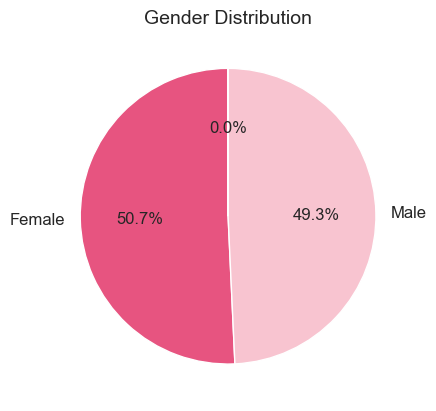

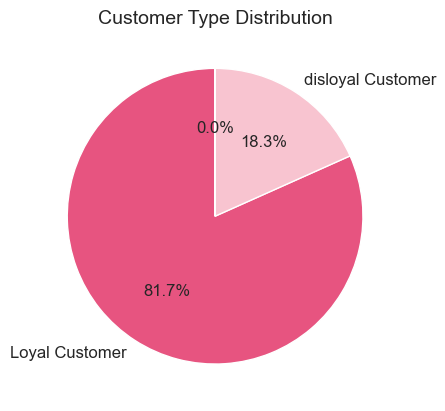

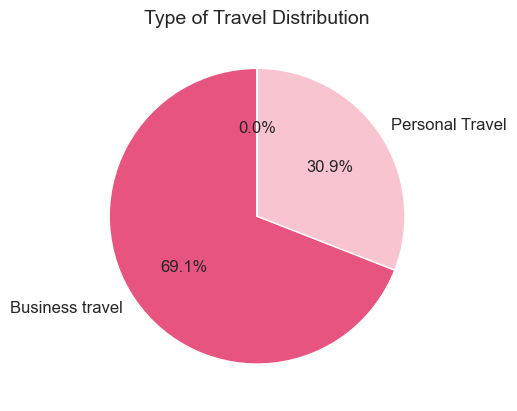

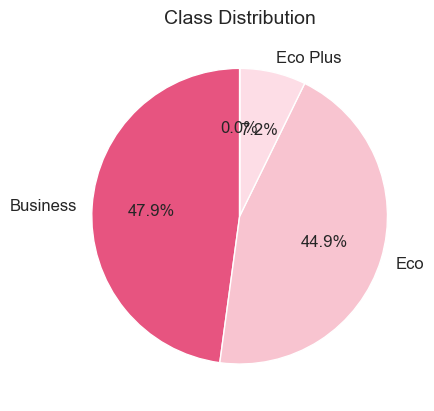

In [122]:
# Importante: asegurarse de tener pandas y matplotlib
import matplotlib.pyplot as plt

pink = "#e75480"
light_pink = "#f8c4d0"
extra_light_pink = "#fddde6"

# Gender - Pie Chart
df_clean['Gender'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=[pink, light_pink], 
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title("Gender Distribution", fontsize=14)
plt.ylabel("")
plt.show()

# Customer Type - Pie Chart
df_clean['Customer Type'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=[pink, light_pink], 
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title("Customer Type Distribution", fontsize=14)
plt.ylabel("")
plt.show()

# Type of Travel - Pie Chart
df_clean['Type of Travel'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=[pink, light_pink], 
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title("Type of Travel Distribution", fontsize=14)
plt.ylabel("")
plt.show()

# Class - Pie Chart
df_clean['Class'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=[pink, light_pink, extra_light_pink], 
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title("Class Distribution", fontsize=14)
plt.ylabel("")
plt.show()


## Boxplots

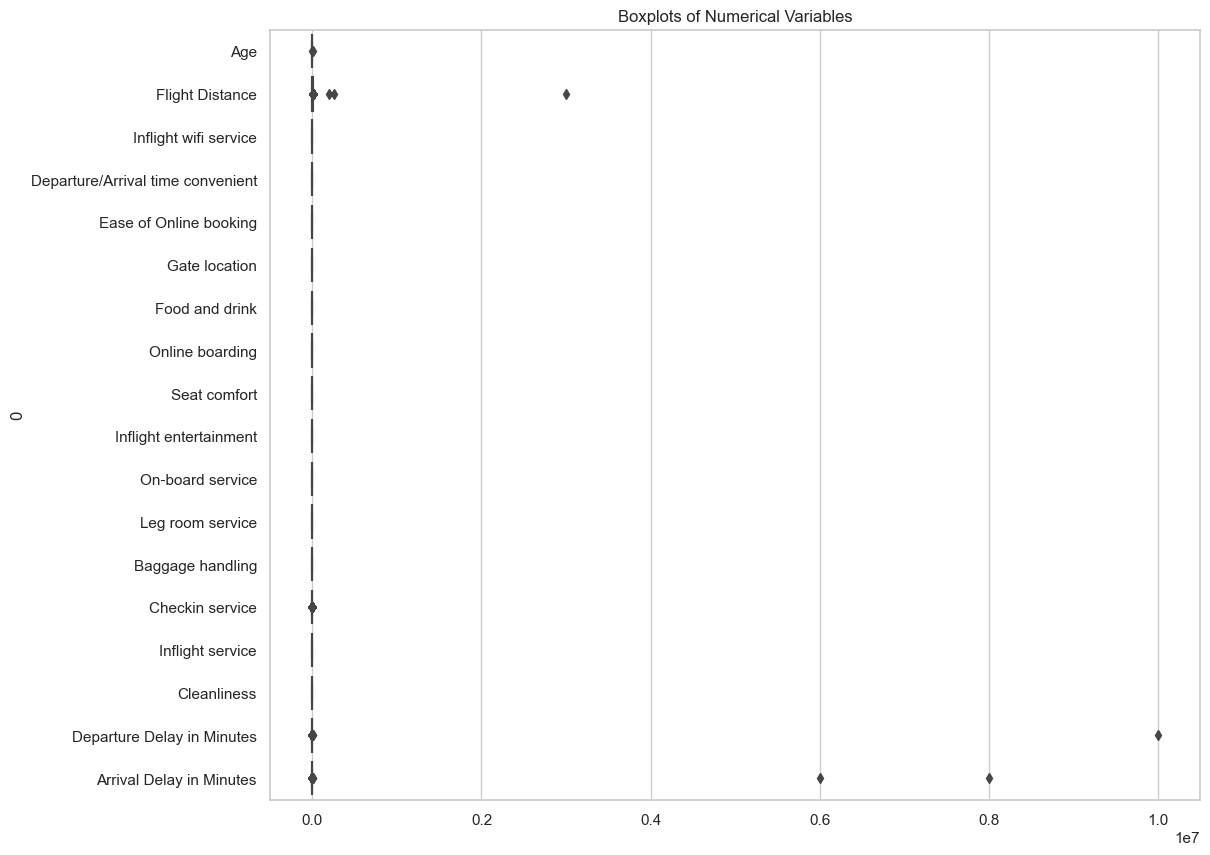

In [123]:
# Generate boxplots for numerical variables
plt.figure(figsize=(12, 10))
sns.boxplot(data=df_clean[cols_numericas], orient='h')
plt.title('Boxplots of Numerical Variables')
plt.show()

Pairplot to visualize relationships between numerical variables

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: Futur

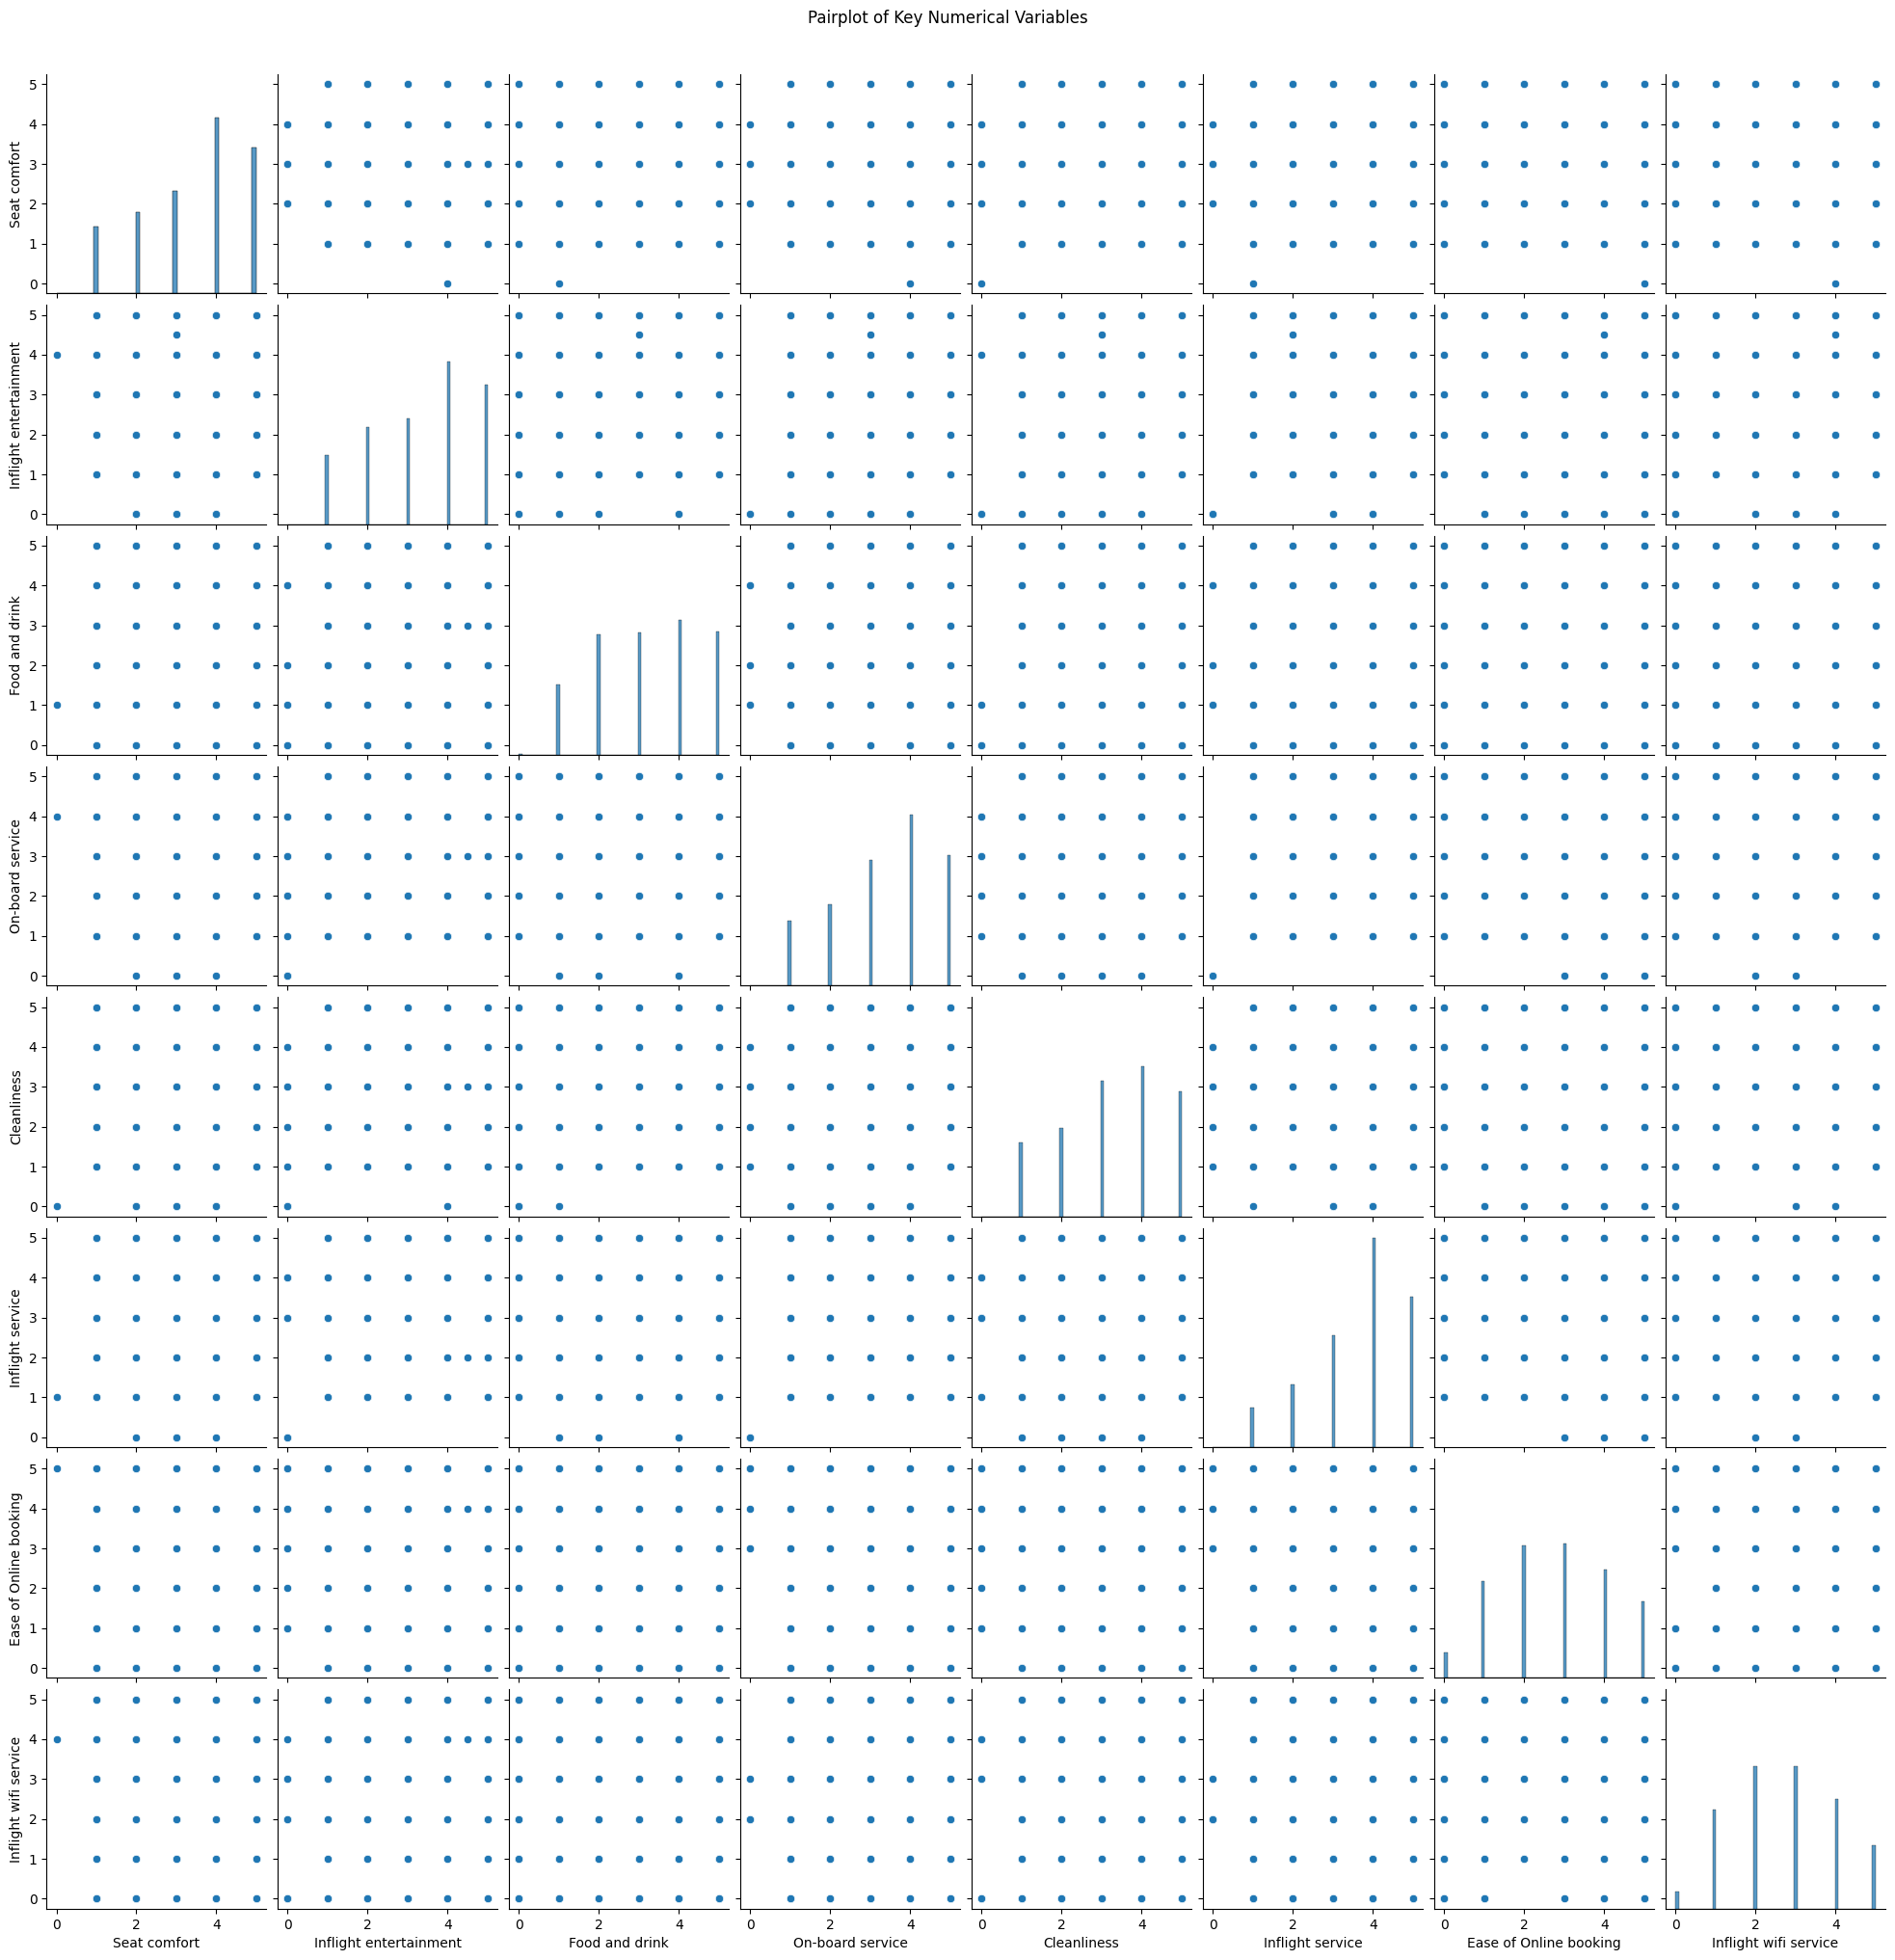

Correlation Matrix of Key Variables:
 0                       Seat comfort  Inflight entertainment  Food and drink  \
0                                                                              
Seat comfort                1.000000                0.611740        0.575843   
Inflight entertainment      0.611740                1.000000        0.623359   
Food and drink              0.575843                0.623359        1.000000   
On-board service            0.130521                0.418591        0.057391   
Cleanliness                 0.679555                0.692453        0.657982   
Inflight service            0.068802                0.406065        0.035185   
Ease of Online booking      0.028566                0.046591        0.030531   
Inflight wifi service       0.121512                0.207802        0.132266   

0                       On-board service  Cleanliness  Inflight service  \
0                                                                         
Seat comfor

In [15]:
# Pairplot para visualizar relaciones entre variables numéricas
cols_pairplot = ['Seat comfort', 'Inflight entertainment', 'Food and drink', 
                 'On-board service', 'Cleanliness', 'Inflight service', 
                 'Ease of Online booking', 'Inflight wifi service']

# Graficamos todas las dispersiones entre estas variables
sns.pairplot(df_clean[cols_pairplot])
plt.suptitle('Pairplot of Key Numerical Variables', y=1.02)
plt.show()

# --------------------------------------------
# Matriz de correlación general
# --------------------------------------------
Corr_Factors = df_clean[cols_pairplot].corr()
print("Correlation Matrix of Key Variables:\n", Corr_Factors)

## Correlation Analysis: Heat Map

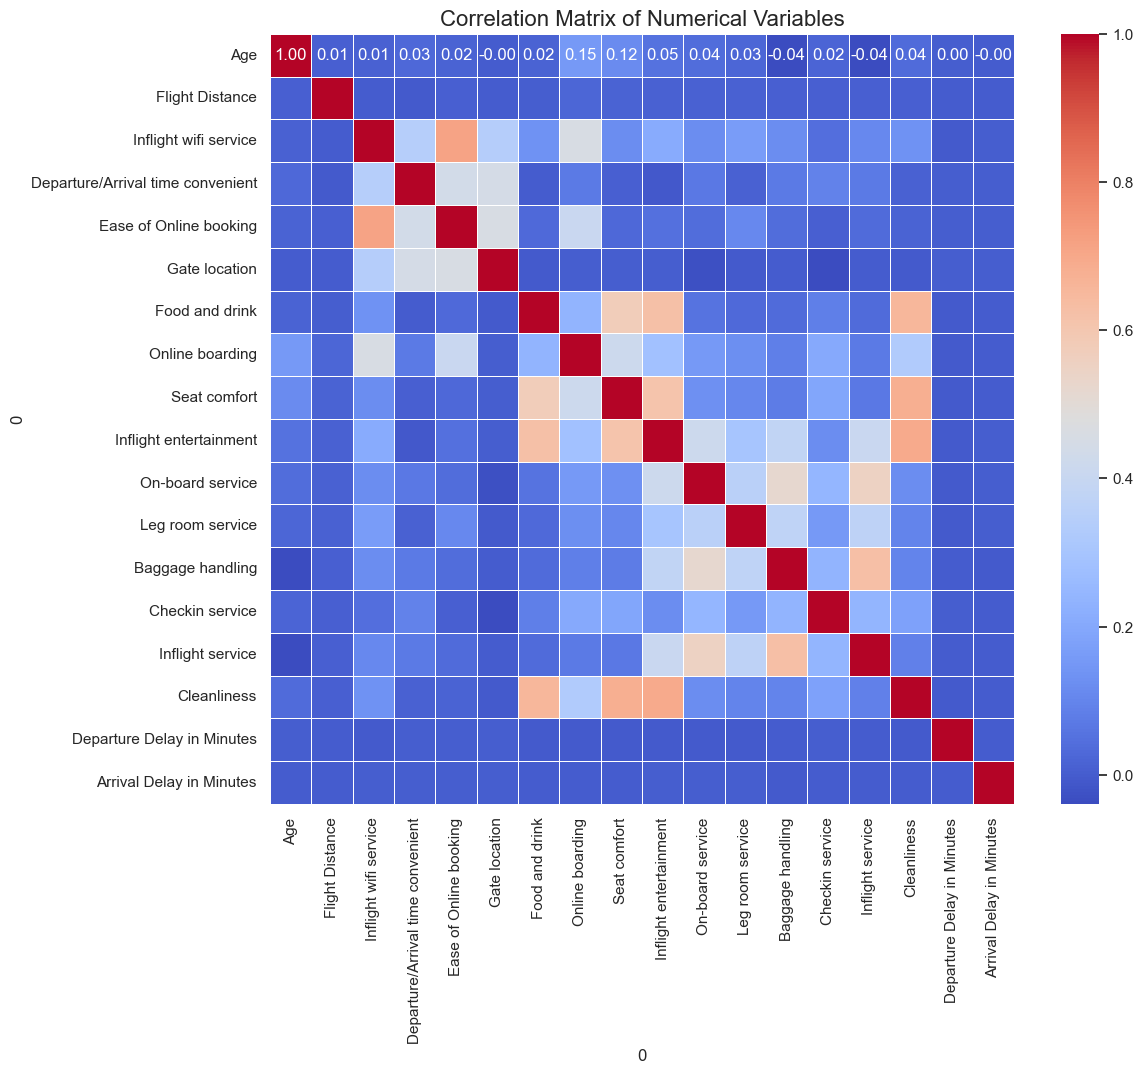

In [124]:
# Calculate the correlation matrix
corr_matrix = df_clean[cols_numericas].corr()

# Generate the heatmap with a custom color palette
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()

# 10. Correlations

Correlation between "Ease of Online booking" and "Inflight wifi service"

Correlation between Ease of Online booking and Inflight Wifi Service: 0.714758476461446


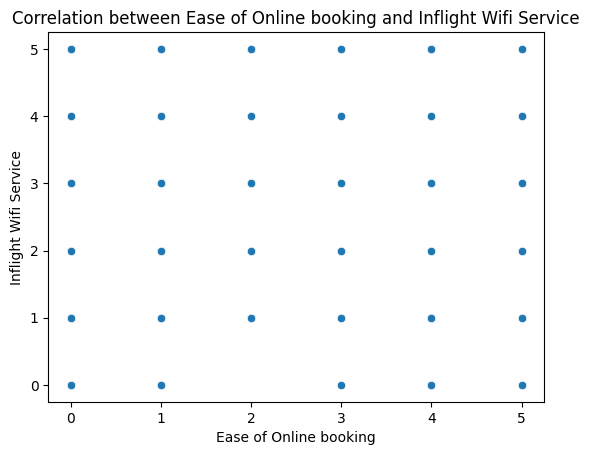

In [17]:
# Correlation between Ease of Online booking and Inflight Wifi Service
corr_online_booking_wifi = df_clean['Ease of Online booking'].corr(df_clean['Inflight wifi service'])
print(f"Correlation between Ease of Online booking and Inflight Wifi Service: {corr_online_booking_wifi}")

# Scatter plot to visualize the correlation
sns.scatterplot(x='Ease of Online booking', y='Inflight wifi service', data=df_clean)
plt.title("Correlation between Ease of Online booking and Inflight Wifi Service")
plt.xlabel("Ease of Online booking")
plt.ylabel("Inflight Wifi Service")
plt.show()

Correlation between "Seat comfort" and "Inflight entertainment"

Correlation between Seat Comfort and Inflight Entertainment: 0.6117396787679633


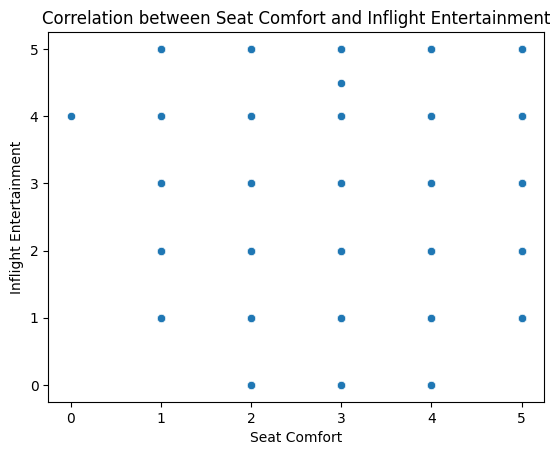

In [18]:
# Correlation between Seat Comfort and Inflight Entertainment
corr_seat_inflight_entertainment = df_clean['Seat comfort'].corr(df_clean['Inflight entertainment'])
print(f"Correlation between Seat Comfort and Inflight Entertainment: {corr_seat_inflight_entertainment}")

# Scatter plot to visualize the correlation
sns.scatterplot(x='Seat comfort', y='Inflight entertainment', data=df_clean)
plt.title("Correlation between Seat Comfort and Inflight Entertainment")
plt.xlabel("Seat Comfort")
plt.ylabel("Inflight Entertainment")
plt.show()

Correlation between "Seat comfort" and "Food and drink"

Correlation between Seat Comfort and Food and Drink: 0.5758434272751362


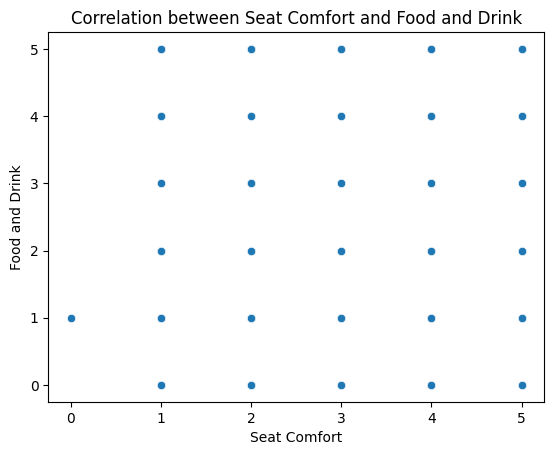

In [19]:
# Correlation between Seat Comfort and Food and Drink
corr_seat_food_drink = df_clean['Seat comfort'].corr(df_clean['Food and drink'])
print(f"Correlation between Seat Comfort and Food and Drink: {corr_seat_food_drink}")

# Scatter plot to visualize the correlation
sns.scatterplot(x='Seat comfort', y='Food and drink', data=df_clean)
plt.title("Correlation between Seat Comfort and Food and Drink")
plt.xlabel("Seat Comfort")
plt.ylabel("Food and Drink")
plt.show()

Correlation between Baggage Handling and Inflight Service

Correlation between Baggage Handling and Inflight Service: 0.6292125519825098


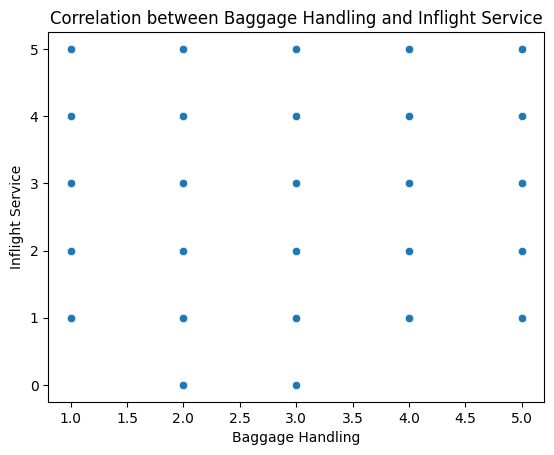

In [20]:
# Correlation between Baggage Handling and Inflight Service
corr_baggage_handling_inflight_service = df_clean['Baggage handling'].corr(df_clean['Inflight service'])
print(f"Correlation between Baggage Handling and Inflight Service: {corr_baggage_handling_inflight_service}")

# Scatter plot to visualize the correlation
sns.scatterplot(x='Baggage handling', y='Inflight service', data=df_clean)
plt.title("Correlation between Baggage Handling and Inflight Service")
plt.xlabel("Baggage Handling")
plt.ylabel("Inflight Service")
plt.show()

Correlation between "Inflight Entertainment" and "Cleanliness"

Correlation between Inflight Entertainment and Cleanliness: 0.6924533813718264


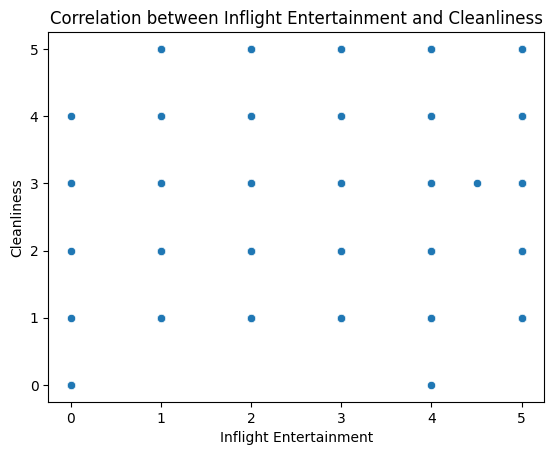

In [21]:
# Correlation between Inflight Entertainment and Cleanliness
corr_inflight_entertainment_cleanliness = df_clean['Inflight entertainment'].corr(df_clean['Cleanliness'])
print(f"Correlation between Inflight Entertainment and Cleanliness: {corr_inflight_entertainment_cleanliness}")

# Scatter plot to visualize the correlation
sns.scatterplot(x='Inflight entertainment', y='Cleanliness', data=df_clean)
plt.title("Correlation between Inflight Entertainment and Cleanliness")
plt.xlabel("Inflight Entertainment")
plt.ylabel("Cleanliness")
plt.show()

# 11. Key features that influence customer spending behavior

Bar chart for Customer Type, Trip Type and Class vs. Satisfaction

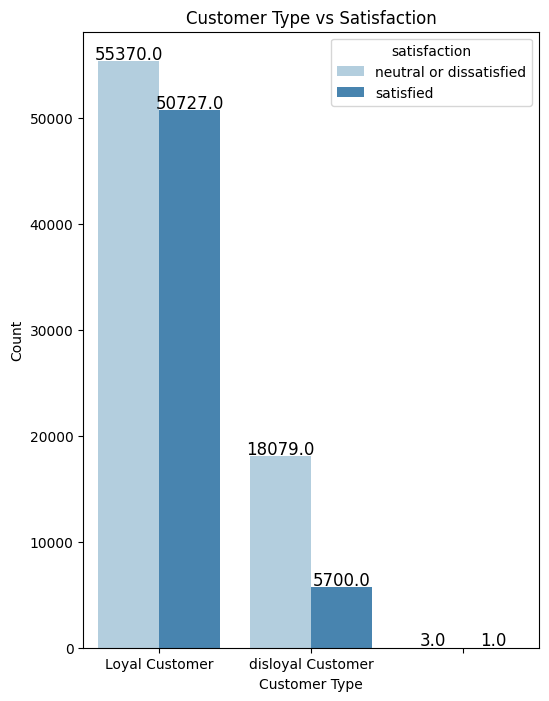

In [22]:
plt.figure(figsize=(20, 8))
# Bar plot for 'Customer Type' vs 'Satisfaction'
plt.subplot(1, 3, 1)
sns.countplot(x='Customer Type', hue='satisfaction', data=df_clean, palette="Blues")
plt.title('Customer Type vs Satisfaction')
plt.xlabel('Customer Type')
plt.ylabel('Count')

# Add numbers on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

Pie chart for 'Customer Type'

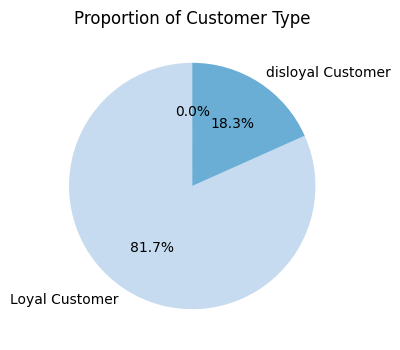

In [23]:
# Pie chart for 'Customer Type'
plt.figure(figsize=(4, 4))
customer_type_counts = df_clean['Customer Type'].value_counts()
plt.pie(customer_type_counts, labels=customer_type_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Blues", n_colors=len(customer_type_counts)))
plt.title('Proportion of Customer Type')
plt.show()

Bar plot for 'Type of Travel' vs 'Satisfaction'

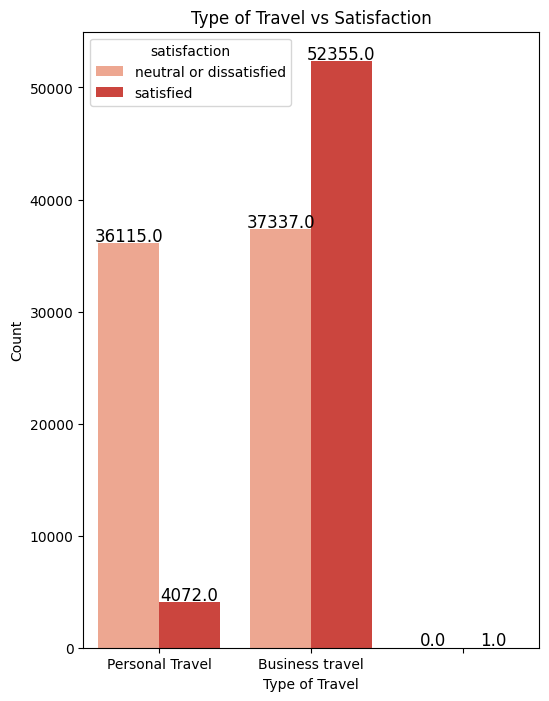

In [24]:
# Bar plot for 'Type of Travel' vs 'Satisfaction'
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 2)
sns.countplot(x='Type of Travel', hue='satisfaction', data=df_clean, palette="Reds")
plt.title('Type of Travel vs Satisfaction')
plt.xlabel('Type of Travel')
plt.ylabel('Count')

# Add numbers on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')


Pie chart for 'Type of Travel'

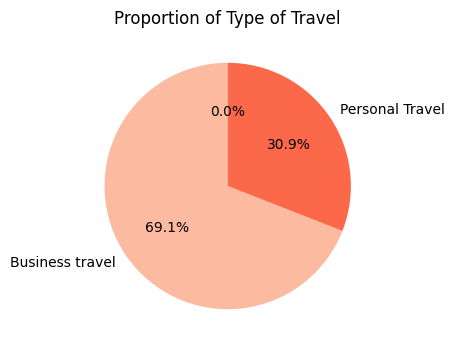

In [25]:
# Pie chart for 'Type of Travel'
plt.figure(figsize=(4, 4))
type_of_travel_counts = df_clean['Type of Travel'].value_counts()
plt.pie(type_of_travel_counts, labels=type_of_travel_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Reds", n_colors=len(type_of_travel_counts)))
plt.title('Proportion of Type of Travel')
plt.show()

Bar plot for 'Class' vs 'Satisfaction'

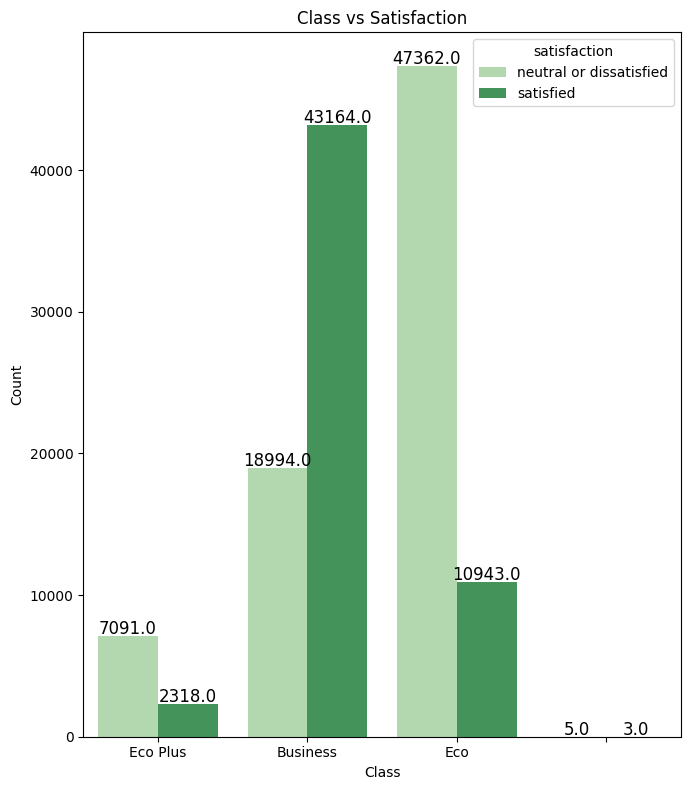

In [26]:
# Bar plot for 'Class' vs 'Satisfaction'
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 3)
sns.countplot(x='Class', hue='satisfaction', data=df_clean, palette="Greens")
plt.title('Class vs Satisfaction')
plt.xlabel('Class')
plt.ylabel('Count')

# Add numbers on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.tight_layout()
plt.show()


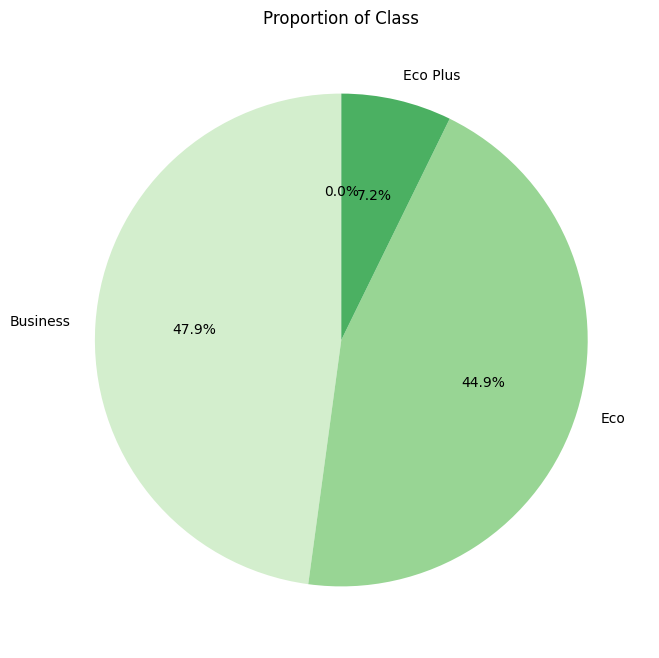

In [27]:
# Pie chart for 'Class'
plt.figure(figsize=(8, 8))
class_counts = df_clean['Class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Greens", n_colors=len(class_counts)))
plt.title('Proportion of Class')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20896\1468495584.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Class', y='Age', hue='Gender', data=df_filtered, palette='Reds', ci=None)


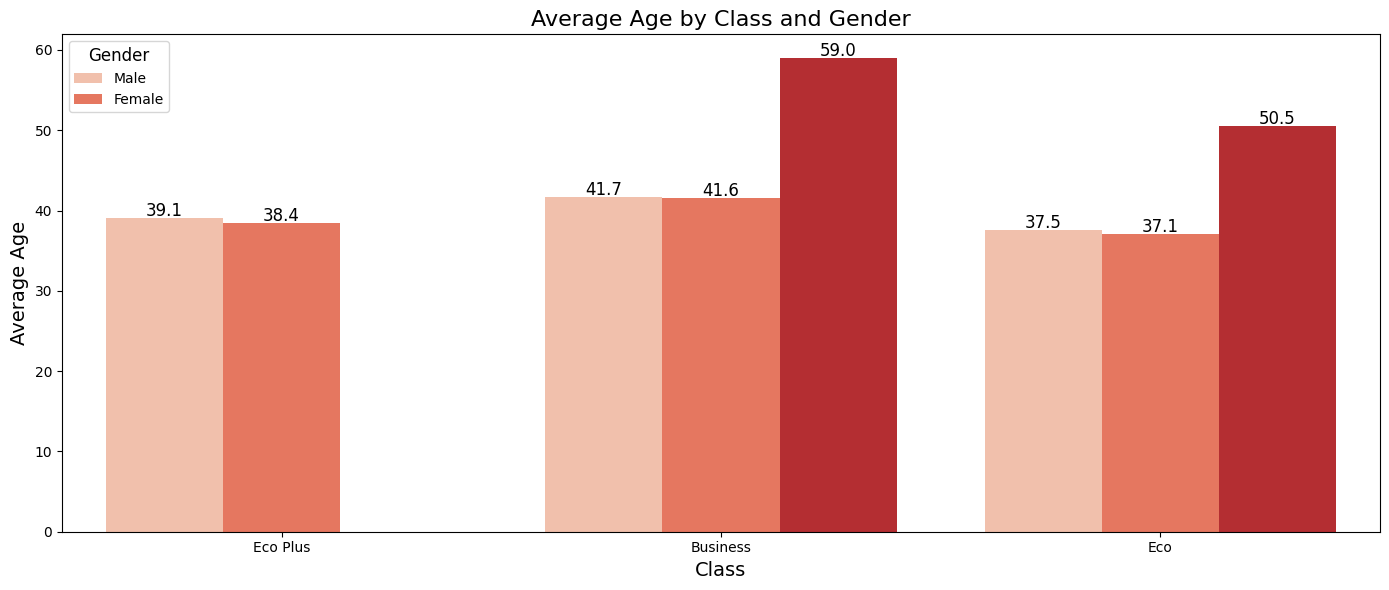

In [28]:
# Filter the data to include only the three classes
df_filtered = df_clean[df_clean['Class'].isin(['Eco', 'Eco Plus', 'Business'])]

# Create the bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='Class', y='Age', hue='Gender', data=df_filtered, palette='Reds', ci=None)

# Customize the title and labels
plt.title('Average Age by Class and Gender', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Average Age', fontsize=14)

# Add numbers on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', 
                       xytext=(0, 5), textcoords='offset points')

# Adjust the legend
plt.legend(title='Gender', title_fontsize=12, fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


In [29]:
# Convert categorical variables to numerical codes
df_encoded = df_clean.copy()
cat_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

for col in cat_columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

In [30]:
# Suggested variables related to spending behavior
variables_spending = ['Customer Type', 'Age', 'Class', 'Flight Distance', 
                      'Inflight wifi service', 'Food and drink', 'Seat comfort',
                      'Inflight entertainment', 'On-board service', 
                      'Departure/Arrival time convenient', 'Leg room service', 
                      'Baggage handling', 'Departure Delay in Minutes', 
                      'Arrival Delay in Minutes', 'Gender']

# Make sure they're in the DataFrame
df_spending = df_encoded[variables_spending]


In [31]:
# Calculate the correlation matrix
corr_matrix = df_spending.corr()

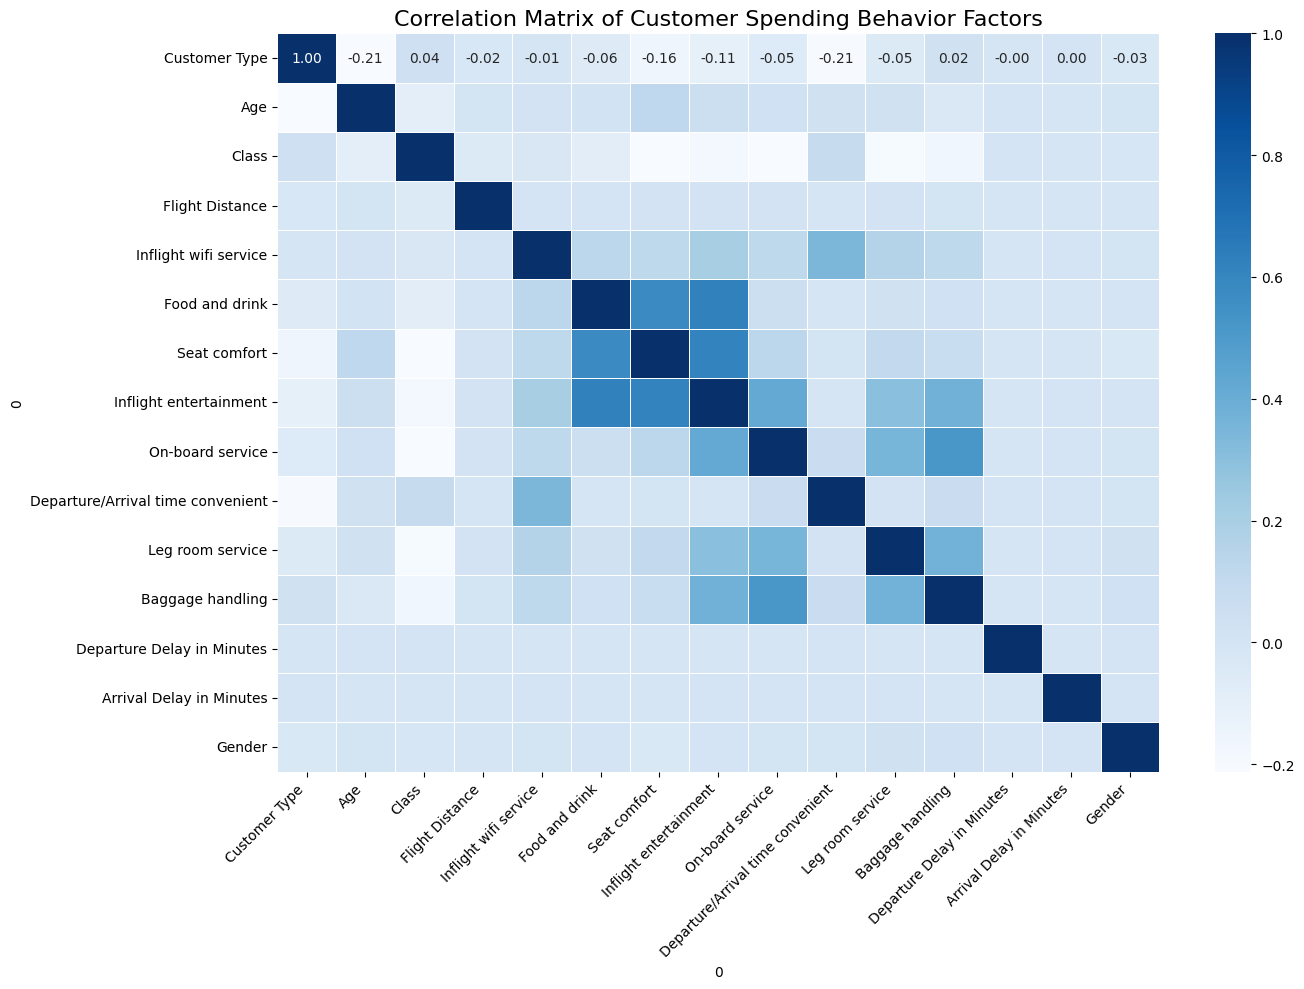

In [32]:
# Heatmap of the correlation matrix
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Customer Spending Behavior Factors', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Baggage Handling vs On-board Service

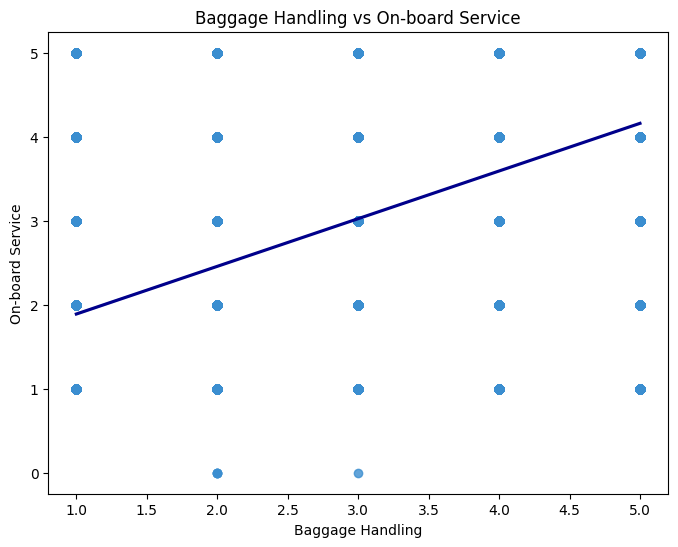

In [33]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_clean, x='Baggage handling', y='On-board service', scatter_kws={'color': '#3B8ED0'}, line_kws={'color': 'darkblue'})
plt.title('Baggage Handling vs On-board Service')
plt.xlabel('Baggage Handling')
plt.ylabel('On-board Service')
plt.show()


Baggage Handling vs Inflight Wifi Service

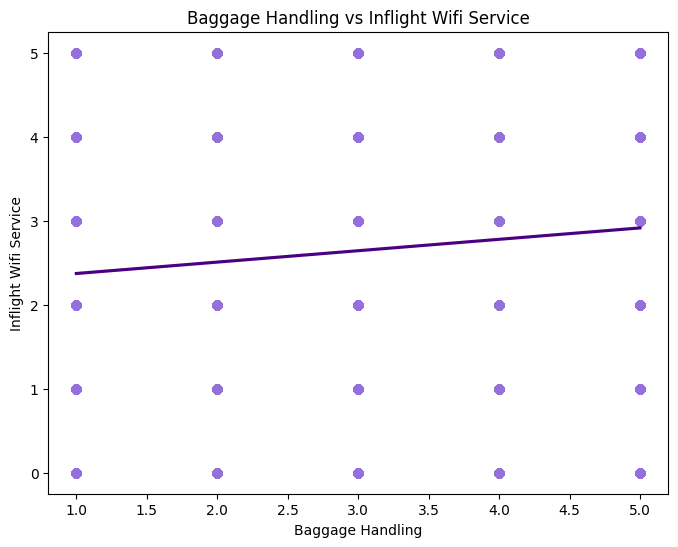

In [34]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_clean, x='Baggage handling', y='Inflight wifi service', scatter_kws={'color': '#9370DB'}, line_kws={'color': '#4B0082'})
plt.title('Baggage Handling vs Inflight Wifi Service')
plt.xlabel('Baggage Handling')
plt.ylabel('Inflight Wifi Service')
plt.show()


Departure/Arrival Time Convenient vs Class

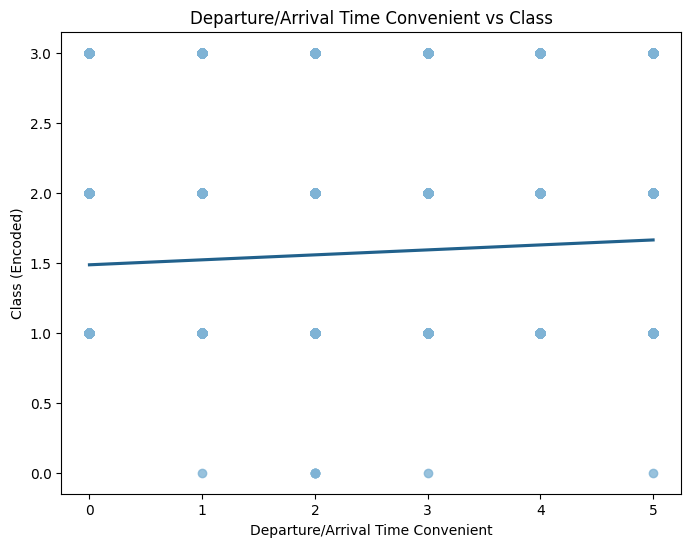

In [35]:
df_encoded = df_clean.copy()
df_encoded['Class'] = df_encoded['Class'].astype('category').cat.codes

plt.figure(figsize=(8,6))
sns.regplot(data=df_encoded, x='Departure/Arrival time convenient', y='Class', scatter_kws={'color': '#7FB3D5'}, line_kws={'color': '#21618C'})
plt.title('Departure/Arrival Time Convenient vs Class')
plt.xlabel('Departure/Arrival Time Convenient')
plt.ylabel('Class (Encoded)')
plt.show()

Seat Comfort vs Age

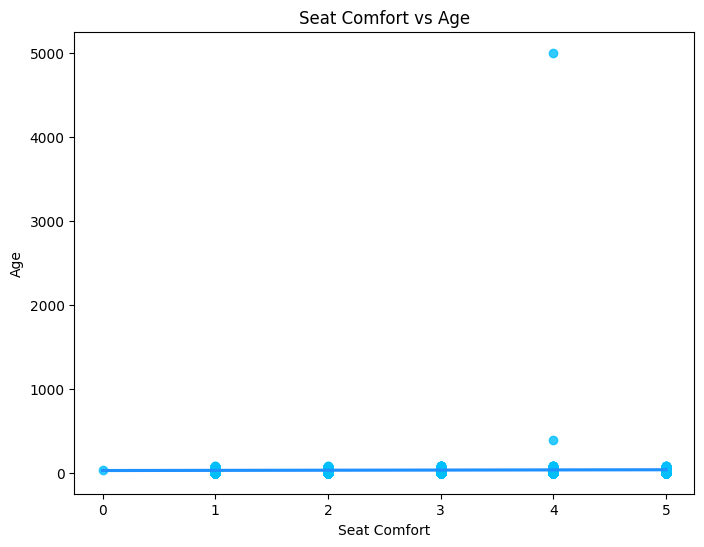

In [36]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_encoded, x='Seat comfort', y='Age', scatter_kws={'color': '#00BFFF'}, line_kws={'color': '#1E90FF'})
plt.title('Seat Comfort vs Age')
plt.xlabel('Seat Comfort')
plt.ylabel('Age')
plt.show()

Customer Type vs Class

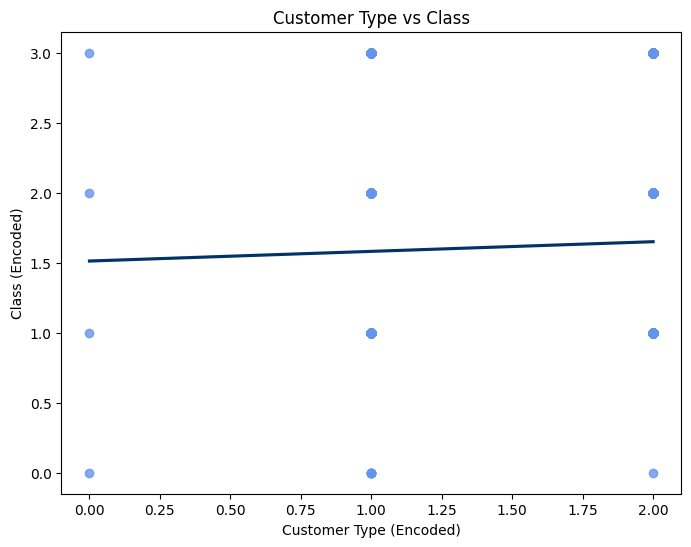

In [37]:
df_encoded['Customer Type'] = df_encoded['Customer Type'].astype('category').cat.codes

plt.figure(figsize=(8,6))
sns.regplot(data=df_encoded, x='Customer Type', y='Class', scatter_kws={'color': '#6495ED'}, line_kws={'color': '#003366'})
plt.title('Customer Type vs Class')
plt.xlabel('Customer Type (Encoded)')
plt.ylabel('Class (Encoded)')
plt.show()


Customer Type vs Class

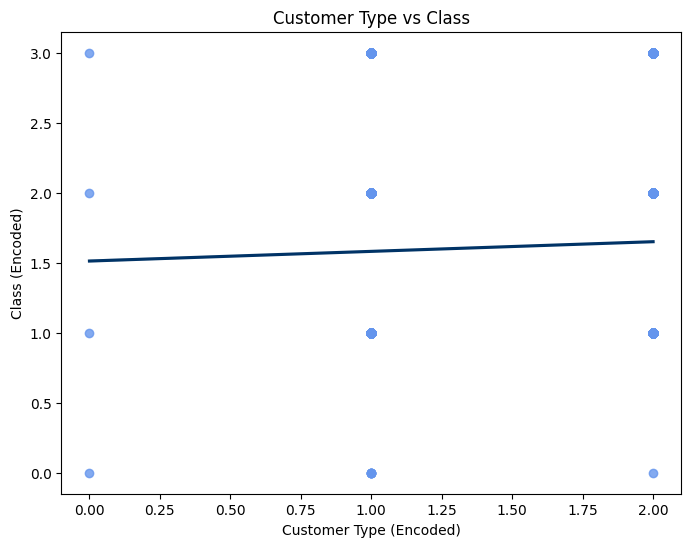

In [38]:
df_encoded['Customer Type'] = df_encoded['Customer Type'].astype('category').cat.codes

plt.figure(figsize=(8,6))
sns.regplot(data=df_encoded, x='Customer Type', y='Class', scatter_kws={'color': '#6495ED'}, line_kws={'color': '#003366'})
plt.title('Customer Type vs Class')
plt.xlabel('Customer Type (Encoded)')
plt.ylabel('Class (Encoded)')
plt.show()


Class vs Departure vs Arrival Time Convenient

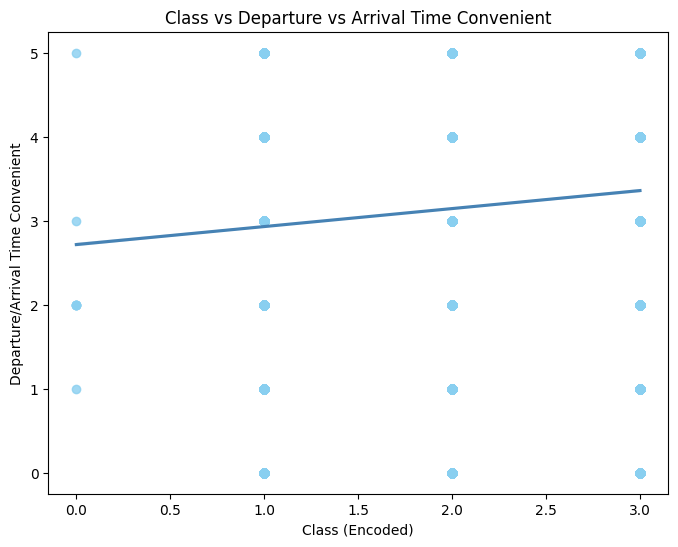

In [39]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_encoded, x='Class', y='Departure/Arrival time convenient', scatter_kws={'color': '#89CFF0'}, line_kws={'color': '#4682B4'})
plt.title('Class vs Departure vs Arrival Time Convenient')
plt.xlabel('Class (Encoded)')
plt.ylabel('Departure/Arrival Time Convenient')
plt.show()

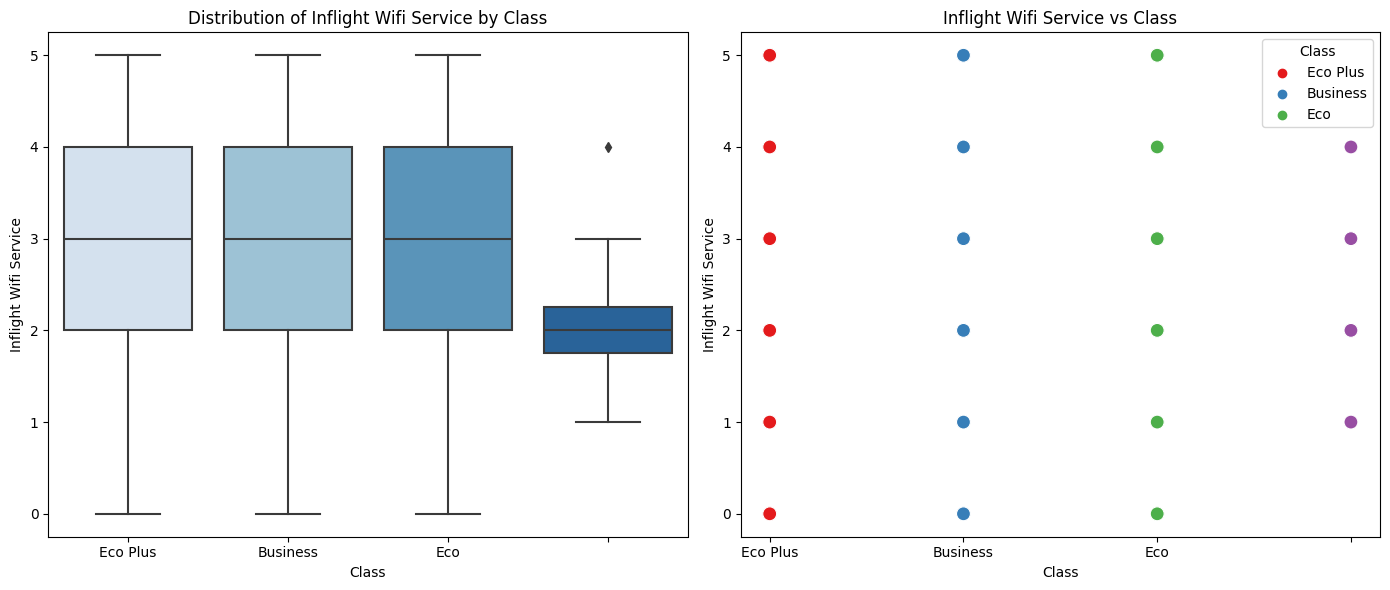

In [40]:
# Creamos los gráficos
plt.figure(figsize=(14, 6))

# Boxplot para la variable 'Inflight wifi service' por 'Class'
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Inflight wifi service', data=df_clean, palette='Blues')
plt.title('Distribution of Inflight Wifi Service by Class')
plt.xlabel('Class')
plt.ylabel('Inflight Wifi Service')

# Scatterplot para la relación entre 'Class' y 'Inflight wifi service'
plt.subplot(1, 2, 2)
sns.scatterplot(x='Class', y='Inflight wifi service', data=df_clean, hue='Class', palette='Set1', s=100)
plt.title('Inflight Wifi Service vs Class')
plt.xlabel('Class')
plt.ylabel('Inflight Wifi Service')

plt.tight_layout()
plt.show()

## 12. Simple Linear Regression to predict customer spending

In [48]:
# Reemplazamos strings vacíos con NaN para poder eliminarlos
df_clean['Flight Distance'].replace('', np.nan, inplace=True)
df_clean['Class_numeric'].replace('', np.nan, inplace=True)

# Aseguramos que 'Flight Distance' sea numérica
df_clean['Flight Distance'] = pd.to_numeric(df_clean['Flight Distance'], errors='coerce')

# Ahora sí, eliminamos todos los nulos
df_plot = df_clean[['Flight Distance', 'Class_numeric']].dropna()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20896\3029870098.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Flight Distance'].replace('', np.nan, inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_20896\3029870098.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

Encode the satisfaction variable

In [67]:
df_clean['satisfaction_numeric'] = df_clean['satisfaction'].replace({
    'neutral or dissatisfied': 0,
    'satisfied': 1
})


C:\Users\Usuario\AppData\Local\Temp\ipykernel_20896\1127601833.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['satisfaction_numeric'] = df_clean['satisfaction'].replace({


Model 1: Flight Distance

In [95]:
# Model 1: Flight Distance
X = df_clean[['Flight Distance']].dropna()
y = df_clean.loc[X.index, 'satisfaction_numeric']

model1 = LinearRegression()
model1.fit(X, y)

# Predictions
y_pred = model1.predict(X)

# Metrics
mse1 = mean_squared_error(y, y_pred)
rmse1 = np.sqrt(mse1)

# Output
print("Model 1 - Flight Distance")
print("Coefficient:", model1.coef_[0])
print("Intercept:", model1.intercept_)
print("R² Score:", model1.score(X, y))
print("MSE:", mse1)
print("RMSE:", rmse1)

Model 1 - Flight Distance
Coefficient: 1.911955274257585e-06
Intercept: 0.43213599109961925
R² Score: 0.0010568716129965017
MSE: 0.24544516821270923
RMSE: 0.4954242305466187


Model 1: Flight Distance vs Satisfaction

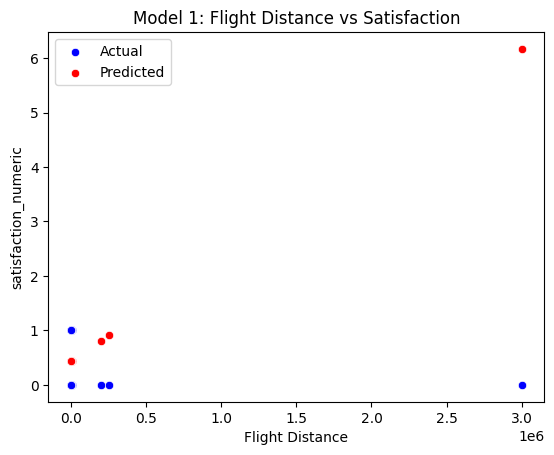

In [69]:
X1 = df_clean[['Flight Distance']].dropna()
y1 = df_clean.loc[X1.index, 'satisfaction_numeric']

model1 = LinearRegression()
model1.fit(X1, y1)

df_clean.loc[X1.index, 'Pred_satisfaction1'] = model1.predict(X1)

sns.scatterplot(x='Flight Distance', y='satisfaction_numeric', data=df_clean, color="blue", label="Actual")
sns.scatterplot(x='Flight Distance', y='Pred_satisfaction1', data=df_clean, color="red", label="Predicted")
plt.title("Model 1: Flight Distance vs Satisfaction")
plt.show()


Model 2: Inflight wifi service

In [97]:
# Model 2: Inflight wifi service
X = df_clean[['Inflight wifi service']].dropna()
y = df_clean.loc[X.index, 'satisfaction_numeric']

model2 = LinearRegression()
model2.fit(X, y)

# Predictions
y_pred = model2.predict(X)

# Metrics
mse2 = mean_squared_error(y, y_pred)
rmse2 = np.sqrt(mse2)

# Output
print("\nModel 2 - Inflight wifi service")
print("Coefficient:", model2.coef_[0])
print("Intercept:", model2.intercept_)
print("R² Score:", model2.score(X, y))
print("MSE:", mse2)
print("RMSE:", rmse2)


Model 2 - Inflight wifi service
Coefficient: 0.10569074775692489
Intercept: 0.14606387613146593
R² Score: 0.08033653662221163
MSE: 0.22596577027595757
RMSE: 0.47535857021406225


Model 2: Inflight wifi service vs Satisfaction

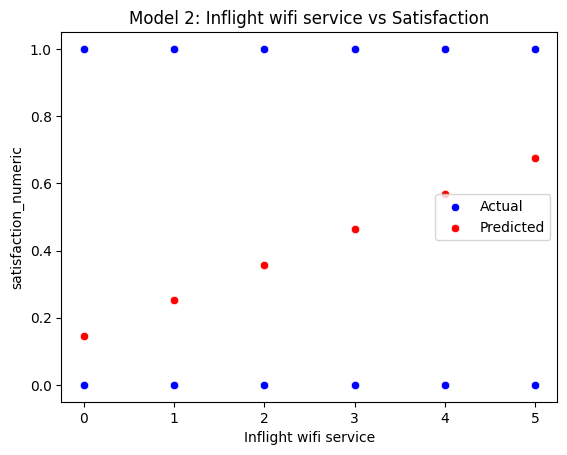

In [63]:
X2 = df_clean[['Inflight wifi service']].dropna()
y2 = df_clean.loc[X2.index, 'satisfaction_numeric']

model2 = LinearRegression()
model2.fit(X2, y2)

df_clean.loc[X2.index, 'Pred_satisfaction2'] = model2.predict(X2)

sns.scatterplot(x='Inflight wifi service', y='satisfaction_numeric', data=df_clean, color="blue", label="Actual")
sns.scatterplot(x='Inflight wifi service', y='Pred_satisfaction2', data=df_clean, color="red", label="Predicted")
plt.title("Model 2: Inflight wifi service vs Satisfaction")
plt.show()


Model 3 - Seat comfort

In [98]:
# Model 3: Seat comfort
X = df_clean[['Seat comfort']].dropna()
y = df_clean.loc[X.index, 'satisfaction_numeric']

model3 = LinearRegression()
model3.fit(X, y)

# Predictions
y_pred = model3.predict(X)

# Metrics
mse3 = mean_squared_error(y, y_pred)
rmse3 = np.sqrt(mse3)

# Output
print("\nModel 3 - Seat comfort")
print("Coefficient:", model3.coef_[0])
print("Intercept:", model3.intercept_)
print("R² Score:", model3.score(X, y))
print("MSE:", mse3)
print("RMSE:", rmse3)


Model 3 - Seat comfort
Coefficient: 0.13107015048392287
Intercept: -0.016601193574823203
R² Score: 0.12168919666357769
MSE: 0.21580522128025548
RMSE: 0.464548405745037


Model 3: Seat comfort vs Satisfaction

C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


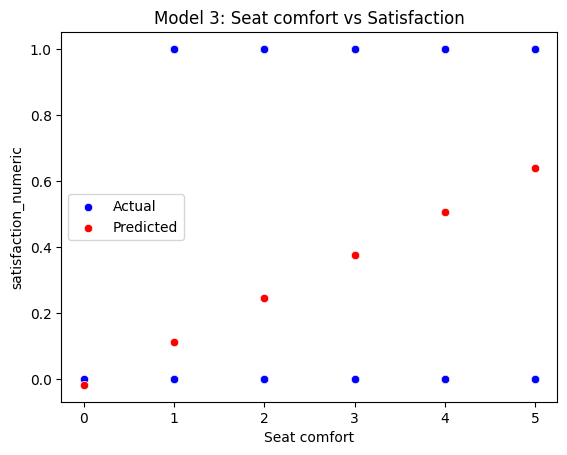

In [64]:
X3 = df_clean[['Seat comfort']].dropna()
y3 = df_clean.loc[X3.index, 'satisfaction_numeric']

model3 = LinearRegression()
model3.fit(X3, y3)

df_clean.loc[X3.index, 'Pred_satisfaction3'] = model3.predict(X3)

sns.scatterplot(x='Seat comfort', y='satisfaction_numeric', data=df_clean, color="blue", label="Actual")
sns.scatterplot(x='Seat comfort', y='Pred_satisfaction3', data=df_clean, color="red", label="Predicted")
plt.title("Model 3: Seat comfort vs Satisfaction")
plt.show()


Model 4 - On-board service

In [99]:
# Model 4: On-board service
X = df_clean[['On-board service']].dropna()
y = df_clean.loc[X.index, 'satisfaction_numeric']

model4 = LinearRegression()
model4.fit(X, y)

# Predictions
y_pred = model4.predict(X)

# Metrics
mse4 = mean_squared_error(y, y_pred)
rmse4 = np.sqrt(mse4)

# Output
print("\nModel 4 - On-board service")
print("Coefficient:", model4.coef_[0])
print("Intercept:", model4.intercept_)
print("R² Score:", model4.score(X, y))
print("MSE:", mse4)
print("RMSE:", rmse4)


Model 4 - On-board service
Coefficient: 0.1240824761925113
Intercept: 0.014684914561874596
R² Score: 0.10380487698190688
MSE: 0.22019948530580166
RMSE: 0.4692541798490469


C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


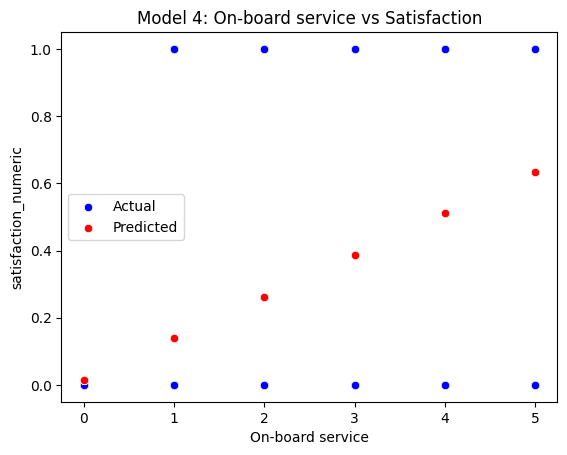

In [65]:
X4 = df_clean[['On-board service']].dropna()
y4 = df_clean.loc[X4.index, 'satisfaction_numeric']

model4 = LinearRegression()
model4.fit(X4, y4)

df_clean.loc[X4.index, 'Pred_satisfaction4'] = model4.predict(X4)

sns.scatterplot(x='On-board service', y='satisfaction_numeric', data=df_clean, color="blue", label="Actual")
sns.scatterplot(x='On-board service', y='Pred_satisfaction4', data=df_clean, color="red", label="Predicted")
plt.title("Model 4: On-board service vs Satisfaction")
plt.show()


Model 5 - Food and drink

In [100]:
# Model 5: Food and drink
X = df_clean[['Food and drink']].dropna()
y = df_clean.loc[X.index, 'satisfaction_numeric']

model5 = LinearRegression()
model5.fit(X, y)

# Predictions
y_pred = model5.predict(X)

# Metrics
mse5 = mean_squared_error(y, y_pred)
rmse5 = np.sqrt(mse5)

# Output
print("\nModel 5 - Food and drink")
print("Coefficient:", model5.coef_[0])
print("Intercept:", model5.intercept_)
print("R² Score:", model5.score(X, y))
print("MSE:", mse5)
print("RMSE:", rmse5)


Model 5 - Food and drink
Coefficient: 0.07878327591503947
Intercept: 0.1819800151388022
R² Score: 0.044674676514090295
MSE: 0.23472806214651631
RMSE: 0.48448742207256146


Model 5: Food and drink vs Satisfaction

C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


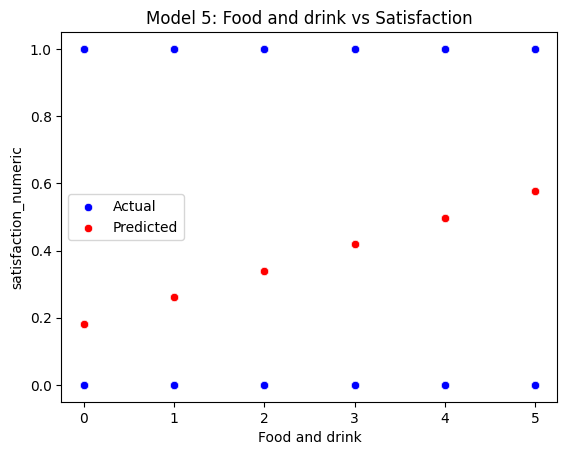

In [66]:
X5 = df_clean[['Food and drink']].dropna()
y5 = df_clean.loc[X5.index, 'satisfaction_numeric']

model5 = LinearRegression()
model5.fit(X5, y5)

df_clean.loc[X5.index, 'Pred_satisfaction5'] = model5.predict(X5)

sns.scatterplot(x='Food and drink', y='satisfaction_numeric', data=df_clean, color="blue", label="Actual")
sns.scatterplot(x='Food and drink', y='Pred_satisfaction5', data=df_clean, color="red", label="Predicted")
plt.title("Model 5: Food and drink vs Satisfaction")
plt.show()


Model 6: Baggage Handling vs On-board Service

In [101]:
# Model 6: Baggage Handling vs On-board Service
X = df_clean[['Baggage handling']].dropna()
y = df_clean.loc[X.index, 'On-board service']

model1 = LinearRegression()
model1.fit(X, y)

# Predictions
y_pred = model1.predict(X)

# Metrics
mse6 = mean_squared_error(y, y_pred)
rmse6 = np.sqrt(mse6)

# Output
print("\nModel 6 - Baggage Handling vs On-board Service")
print("Coefficient:", model1.coef_[0])
print("Intercept:", model1.intercept_)
print("R² Score:", model1.score(X, y))
print("MSE:", mse6)
print("RMSE:", rmse6)



Model 6 - Baggage Handling vs On-board Service
Coefficient: 0.5675174391071882
Intercept: 1.3217610353832385
R² Score: 0.27070853813834694
MSE: 1.208124543205472
RMSE: 1.0991471890540738


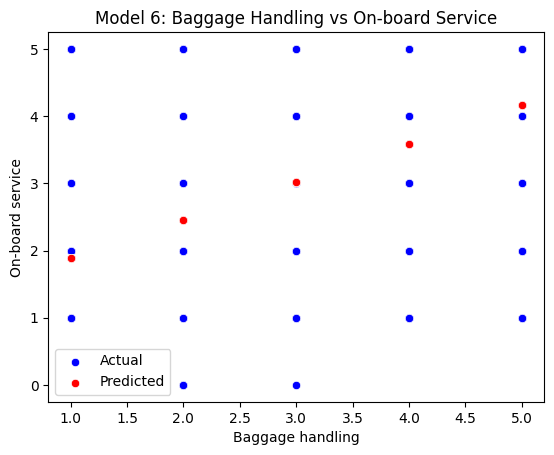

In [88]:
X1 = df_clean[['Baggage handling']].dropna()
y1 = df_clean.loc[X1.index, 'On-board service']

model1 = LinearRegression()
model1.fit(X1, y1)

df_clean.loc[X1.index, 'Pred_onboard_service'] = model1.predict(X1)

sns.scatterplot(x='Baggage handling', y='On-board service', data=df_clean, color="blue", label="Actual")
sns.scatterplot(x='Baggage handling', y='Pred_onboard_service', data=df_clean, color="red", label="Predicted")
plt.title("Model 6: Baggage Handling vs On-board Service")
plt.show()

Model 7 - Baggage Handling vs Inflight Wifi Service

In [102]:
# Model 7: Baggage Handling vs Inflight Wifi Service
X = df_clean[['Baggage handling']].dropna()
y = df_clean.loc[X.index, 'Inflight wifi service']

model2 = LinearRegression()
model2.fit(X, y)

# Predictions
y_pred = model2.predict(X)

# Metrics
mse7 = mean_squared_error(y, y_pred)
rmse7 = np.sqrt(mse7)

# Output
print("\nModel 7 - Baggage Handling vs Inflight Wifi Service")
print("Coefficient:", model2.coef_[0])
print("Intercept:", model2.intercept_)
print("R² Score:", model2.score(X, y))
print("MSE:", mse7)
print("RMSE:", rmse7)


Model 7 - Baggage Handling vs Inflight Wifi Service
Coefficient: 0.13563007394082277
Intercept: 2.236078448715401
R² Score: 0.014494833086423409
MSE: 1.741453140502075
RMSE: 1.319641292360191


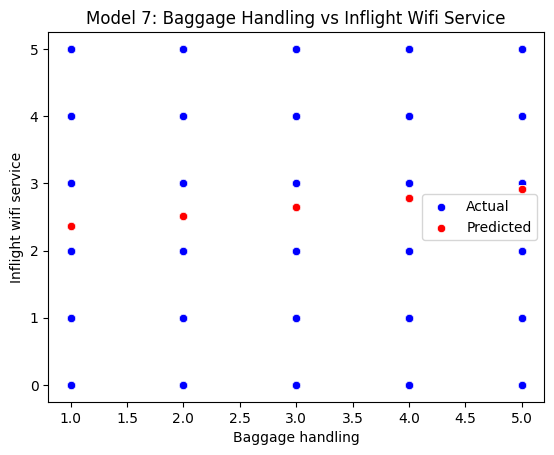

In [90]:
X2 = df_clean[['Baggage handling']].dropna()
y2 = df_clean.loc[X2.index, 'Inflight wifi service']

model2 = LinearRegression()
model2.fit(X2, y2)

df_clean.loc[X2.index, 'Pred_inflight_wifi'] = model2.predict(X2)

sns.scatterplot(x='Baggage handling', y='Inflight wifi service', data=df_clean, color="blue", label="Actual")
sns.scatterplot(x='Baggage handling', y='Pred_inflight_wifi', data=df_clean, color="red", label="Predicted")
plt.title("Model 7: Baggage Handling vs Inflight Wifi Service")
plt.show()
